## Data Visualization: Personal View
***

### Datasets:
#### TIF District Programming - 2017-2021 (tif.csv)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-District-Programming-2017-2021/ycd5-punx/about_data)
- **Description:** Provided by the City of Chicago Office of Budget and Management, this dataset compiles financial data from Tax Increment Financing (TIF) districts, covering the years 2017 through their planned expiration. It includes estimated fund balances, project expenditures, and revenue projections based on property values within each TIF district. TIF districts are designated areas where property tax revenues are earmarked for specific development projects, aimed at revitalizing underdeveloped areas and stimulating economic growth.
-**Licensing and Attribution:**
    - Terms of Use: “This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.”

-**File Size:** 732 KB
-**Data Characteristics:**
    - 8 Columns, 6,663 Rows
    - Field Names: TIF ID, TIF Name, Time Period, Type, Description, Amount, Designation Date, Expiration Date

#### TIF Boundaries (tif_boundaries.geojson)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-Boundaries/ku9w-h8e9)
- **Description:** Created by Thomas Applegate, this data source contains information Tax Increment Financing (TIF) district boundaries in Chicago. The data can be viewed on the Chicago Data Portal with a web browser. However, to view or use the files outside of a web browser, you will need to use compression software and special GIS software, such as ESRI ArcGIS (shapefile) or Google Earth (KML or KMZ), is required.
-**Licensing and Attribution:**
    - Terms of Use: Same terms of use as the TIF District Programming Dataset.

-**File Size:** 3.8 MB
-**Data Characteristics:**
    - 21 Columns, 121 Rows
    - Field Names: sbif, name, shape_area, show, objectid_1, name_trim, wards_2023, ref, approval_d, objectid, fid_1, shape_leng, comm_area, objectid_2, use, repealed_d, type, shape_le_1, ind, expiration, geometry


In [18]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import random
import matplotlib.cm as cm


In [19]:
# Importing in the basic tif boundaries geojson file
gdf = gpd.read_file('data/tif_boundaries.geojson')

In [20]:
# Looking at the Column Names
gdf.columns

Index(['sbif', 'name', 'shape_area', 'show', 'objectid_1', 'name_trim',
       'wards_2023', 'ref', 'approval_d', 'objectid', 'fid_1', 'shape_leng',
       'comm_area', 'objectid_2', 'use', 'repealed_d', 'type', 'shape_le_1',
       'ind', 'expiration', 'geometry'],
      dtype='object')

In [21]:
gdf = gdf[gdf['type']=='Existing']

In [22]:
df = pd.read_csv('data/tif.csv')
df['Designation Date'] = pd.to_datetime(df['Designation Date'], format='%m/%d/%Y')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%m/%d/%Y')
df.rename(columns={'TIF Number': 'ref'}, inplace=True)

In [23]:
total_amounts = df.groupby('ref')['Amount'].agg('sum').reset_index()


In [24]:
# total_amounts = df.groupby('ref').reset_index()

In [25]:
total_amounts

,ref,Amount
0,T-001,25030400
1,T-002,119700
2,T-004,1635500
3,T-005,445000
4,T-009,75800
...,...,...
144,T-176,30195600
145,T-177,2941500
146,T-178,17698400
147,T-179,0


In [26]:
df[df['ref']=='T-179']

,ref,TIF Name,Time Period,Type,Description,Amount,Designation Date,Expiration Date
4,T-179,Diversey Chicago River,2017,Current Obligations,Bridge repairs - Diversey Parkway,-200000,2016-10-05,2040-12-31
731,T-179,Diversey Chicago River,2017,Transfers Between TIF Districts,From Addison South (Bridge repairs),200000,2016-10-05,2040-12-31


In [27]:
merged_df = gdf.merge(total_amounts, on='ref', how='left')
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

In [28]:
merged_gdf.shape

(121, 22)

In [29]:
merged_gdf[merged_gdf['ref']=='T-179']

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry,Amount
10,N,Diversey/Chicago River,919516.820205,1,11,Diversey/Chicago River,32,T-179,10/6/2016,5173,...,"5, 7",68,Mixed-use: Res/Comm/Instit/Parks/Open Space,None,Existing,5793.83689783,Mixed-Use,12/31/2040,"MULTIPOLYGON (((-87.68309 41.93505, -87.68300 ...",0.0


In [30]:
gdf.columns

Index(['sbif', 'name', 'shape_area', 'show', 'objectid_1', 'name_trim',
       'wards_2023', 'ref', 'approval_d', 'objectid', 'fid_1', 'shape_leng',
       'comm_area', 'objectid_2', 'use', 'repealed_d', 'type', 'shape_le_1',
       'ind', 'expiration', 'geometry'],
      dtype='object')

In [31]:
gdf['use'].value_counts()

use
Industrial                                          19
Mixed-use:  See Plan for Details                    16
Mixed-use:  Residential/Commercial                  15
Residential                                         10
Commercial                                           8
Mixed-use:  Residential/Commercial/Institutional     6
Mixed-use:  Res/Comm/Indus/Instit                    6
Mixed-use:  Res/Comm/Instit/Parks/Open Space         4
Mixed-use:  Commercial/Residential/Institutional     3
Mixed-use:  Industrial/Commercial                    3
Mixed-use:  Residential/Commercial/Industrial        3
Mixed-use:  Commercial/Residential/Public            2
Mixed-use:  Residential/Commercial/Retail            2
Mixed-use:  Commercial/Residential/Office            2
Transit Facilities                                   2
Mixed-use:  Commercial/Residential                   2
Mixed-use: Comm/Indust/Institut/Parks/Open Space     1
Mixed-use:  Residential/Open Space                   1
Mixed-

In [32]:
def categorize_use(use):
    use = use.lower()
    if 'residential' in use:
        return 'Residential'
    elif 'commercial' in use:
        return 'Commercial'
    elif 'industrial' in use:
        return 'Industrial'
    else:
        return 'Mixed-use'

gdf['use'] = gdf['use'].apply(categorize_use)


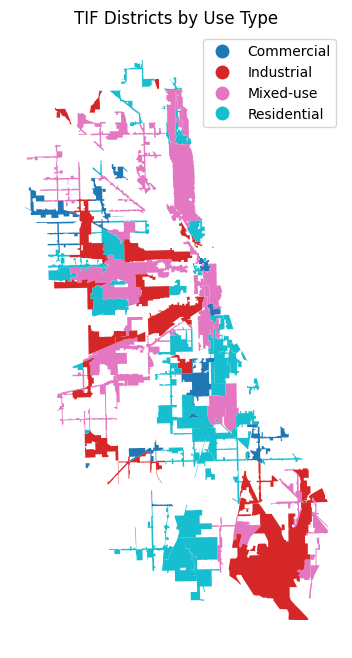

In [33]:
# Chart 1: Generates a graph that looks at the TIF Districts by Use Type
ax = gdf.plot(column='use', legend=True, figsize=(10, 8))
ax.axis('off')
leg = ax.get_legend()
ax.set_title('TIF Districts by Use Type')
plt.show()


In [34]:
gdf.head(2)

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry
0,N,116th/Avenue O,11512032.0441,1,1,116th/Avenue O,10,T-182,10/31/2018,5167,...,22113.6634385,"51,52,55",100,Mixed-use,None,Existing,22113.6634385,Mixed-use,12/31/2042,"MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ..."
1,Y,Bryn Mawr/Broadway,1497351.76204,1,2,Bryn Mawr/Broadway,48,T- 13,11/4/1998,5207,...,10146.7645744,77,38,Residential,None,Existing,10146.7645744,Mixed-use,12/31/2032,"MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ..."


In [35]:
# Creating a List of the Wards in the from the dataset
wards = []
for ward in gdf['wards_2023']:
    ward = ward.split(',')
    wards.append(ward)

elements =[]
for element in wards:
    if len(element) > 1:
        for item in element:
            elements.append(item)
    else:
        elements.append(element[0])
    
print(list(set(elements)))
wards_list = list(set(elements))

['4', '45', '20', '12', '25', '33', '32', '47', '26', '36', '6', '46-48', '1', '19', '49', '3', '34', '16', '10', '43', '18', '7', '42', '40', '31', '50', '9', '28', '29', '5', '35', '30', '11', '13', '17', '27', '14', '46', '24', '15', '23', '44', '37', '39', '38', '2', '8', '48', '21', '22']


In [36]:
# Creating a dictionary that will shows the Wards and TIF District Counts. Note, not all wards may benefit the same from a TIF District
data = {}

for ward in wards_list:
    count = 0 
    for project in gdf['wards_2023']:
        if ward in project:
            count += 1
    data[ward] = count
        
print(data)


{'4': 49, '45': 3, '20': 11, '12': 6, '25': 9, '33': 3, '32': 6, '47': 5, '26': 6, '36': 9, '6': 29, '46-48': 1, '1': 49, '19': 5, '49': 2, '3': 50, '34': 7, '16': 6, '10': 6, '43': 1, '18': 4, '7': 33, '42': 7, '40': 8, '31': 5, '50': 2, '9': 25, '28': 10, '29': 7, '5': 31, '35': 5, '30': 6, '11': 10, '13': 4, '17': 8, '27': 11, '14': 4, '46': 5, '24': 6, '15': 6, '23': 6, '44': 1, '37': 5, '39': 6, '38': 2, '2': 67, '8': 28, '48': 5, '21': 6, '22': 8}


In [37]:
# # del data['46-48']

# for i in range(46,49):
#     if data[i] == None:
#         data[i] = 1
#     else:
#         val = data[i]
#     print(val)

In [38]:
ward_df = pd.DataFrame(data.values(), index=data.keys(), columns=['count'])


/var/folders/zv/n7l2w09n51l8qszs6rj9vnp00000gn/T/ipykernel_92606/3908442650.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


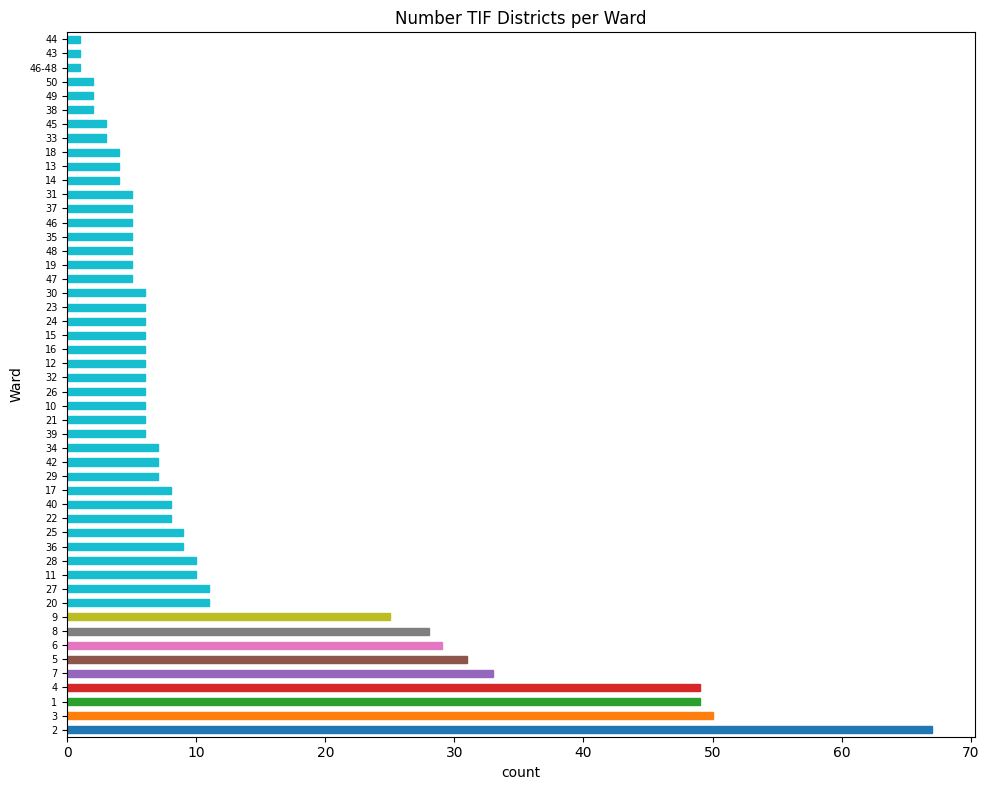

In [39]:
# Chart 2 Using the ward data frame that I created, I am now looking at the count of the tif Districts within the wards. 
# Here is a simple bar that visualizes the # of TIF districts spanning each ward.

cmap = cm.get_cmap('tab10')
ward_df = ward_df.sort_values('count', ascending=False)

plt.figure(figsize=(10, 8))
bars = ward_df['count'].plot(kind='barh')
for i, bar in enumerate(bars.patches):
    bar.set_color(cmap(i))
    
plt.title('Number TIF Districts per Ward')
plt.xlabel('count')
plt.ylabel('Ward')
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()
